  # Pitchfork Scores Analysis

Here, I explore and visualize Pitchfork Magazine's scores using the dataset obtained from Kaggle in SQLite format. The .csv version presented here has been pre-processed through R.  

* **Part 1: Data Processing**: understanding the dataset and merging the datasets.

    -  Packages and Data Upload
    -  Understanding the dataset
    -  Dropping unnecessary variables
    -  Cleaning NULL values
* **Part 2: Data Visualization / Descriptive Statistics**: Extracting insights by visualizing relationships between variables.
* **Part 3: Data Visualization / Inferential Statisics**: Extracting insights by visualizing relationships between variables. 
* **Part 4: Data Extraction**: Extracting particular portions of the data (such as, which albums got perfect scores?) based on some questions I had on Pitchfork editorial opinion. 

# Part 1: Data Processing

In this part, I process the information across the entirety of the dataset. I begin by understanding the dataset and its contents on a high level by implementing seaborn's heatmap capacities, and cleaning where necessary. 

**Packages and Data Upload**

In [216]:
# Numerical packages

import pandas as pd
import numpy as np

In [217]:
# Plotting packages

import matplotlib.pyplot as plt
import seaborn as sns

In [218]:
# Inline call

%matplotlib inline

In [219]:
# Data Upload

pitchfork_data = pd.read_csv('pitchfork_scores.csv')

**Understanding the dataset**

In [220]:
# Understanding the content of each column in the dataset

pitchfork_data.head()

,Unnamed: 0,reviewid,title,artist,score,best_new_music,author_type,pub_date,pub_day,pub_month,pub_year,label,genre,year
0,1,22703,mezzanine,massive attack,9.3,0,contributor,2017-01-08,8,1,2017,virgin,electronic,1998.0
1,2,22721,prelapsarian,krallice,7.9,0,contributor,2017-01-07,7,1,2017,hathenter,metal,2016.0
2,3,22659,all of them naturals,uranium club,7.3,0,contributor,2017-01-07,7,1,2017,fashionable idiots,rock,2016.0
3,4,22659,all of them naturals,uranium club,7.3,0,contributor,2017-01-07,7,1,2017,static shock,rock,2016.0
4,5,22661,first songs,"kleenex, liliput",9.0,1,associate reviews editor,2017-01-06,6,1,2017,kill rock stars,rock,2016.0


We don't need the following columns:

* Column 1 (which used to be index in the original dataset)
* pub_date (since we already have those columns broken down for us)

In [221]:
# Dropping the required column:

pitchfork_data = pitchfork_data.drop(['Unnamed: 0', 'pub_date'], axis=1)

In [222]:
# We will also drop any duplicates of reviews, since review_ids can be distributed across different labels.

pitchfork_data = pitchfork_data.drop_duplicates(subset = 'reviewid', keep = 'first')

In [223]:
# Checking the dataset again

pitchfork_data.head()

,reviewid,title,artist,score,best_new_music,author_type,pub_day,pub_month,pub_year,label,genre,year
0,22703,mezzanine,massive attack,9.3,0,contributor,8,1,2017,virgin,electronic,1998.0
1,22721,prelapsarian,krallice,7.9,0,contributor,7,1,2017,hathenter,metal,2016.0
2,22659,all of them naturals,uranium club,7.3,0,contributor,7,1,2017,fashionable idiots,rock,2016.0
4,22661,first songs,"kleenex, liliput",9.0,1,associate reviews editor,6,1,2017,kill rock stars,rock,2016.0
6,22725,new start,taso,8.1,0,tracks coordinator,6,1,2017,teklife,electronic,2016.0


In [224]:
# Understanding the type of data in each column in the dataset

pitchfork_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18389 entries, 0 to 25921
Data columns (total 12 columns):
reviewid          18389 non-null int64
title             18387 non-null object
artist            18387 non-null object
score             18389 non-null float64
best_new_music    18389 non-null int64
author_type       14485 non-null object
pub_day           18389 non-null int64
pub_month         18389 non-null int64
pub_year          18389 non-null int64
label             18342 non-null object
genre             16024 non-null object
year              17983 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 1.8+ MB


*Note*: This dataset has 25,992 entries. 

We should transform the pub_day, pub_month, and pub_year variables into strings, since we will be interested in exploring score distributions across each of these as a specific category. Additionally, we need to transform the year variable into object type. 

In [225]:
# Changing column types from int and float to object

pitchfork_data[['pub_day', 'pub_month', 'pub_year', 'year']] = pitchfork_data[['pub_day', 'pub_month', 'pub_year', 'year']].astype('object')

In [226]:
# Checking again the type of data in each column in the dataset

pitchfork_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18389 entries, 0 to 25921
Data columns (total 12 columns):
reviewid          18389 non-null int64
title             18387 non-null object
artist            18387 non-null object
score             18389 non-null float64
best_new_music    18389 non-null int64
author_type       14485 non-null object
pub_day           18389 non-null object
pub_month         18389 non-null object
pub_year          18389 non-null object
label             18342 non-null object
genre             16024 non-null object
year              17983 non-null object
dtypes: float64(1), int64(2), object(9)
memory usage: 1.8+ MB


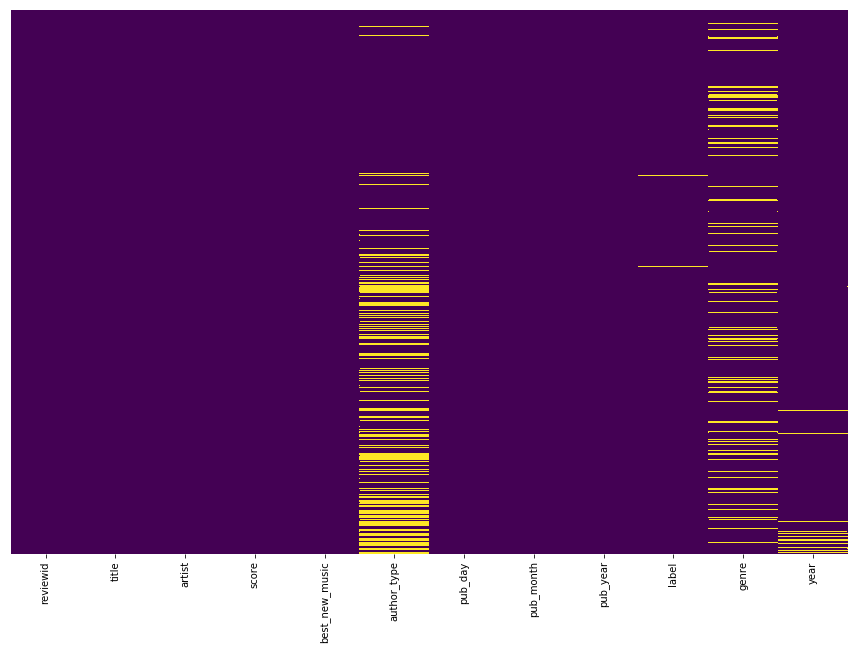

In [227]:
# Checking for presence of null values in each column, where purple = data and yellow = NULL

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(pitchfork_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

*Interpretation*: The author_type variable is unfortunately rife with null values, so it doesn't make much sense to contain it in the dataset. The *genre* variable also has numerous null values, but we can create an 'unknown' category for genre to avoid biased imputation methods. Finally, *year*, *label*, and *title* variables have some null values that we might need to drop. Let's start from the simpler ones. 

In [228]:
# Dropping the author_type column

pitchfork_data = pitchfork_data.drop('author_type', axis=1)

In [229]:
# Import float division capability

from __future__ import division

In [230]:
# Let's check how much of the dataset null values occupy for the year variable:

round(len(pitchfork_data[pitchfork_data['year'].isna() == 1])*100/len(pitchfork_data['year']), 3) 

2.208

2.3% of data points in the *year* variable are null, which means we can safely drop them, as it won't affect our analysis that much. 

In [231]:
# Let's check how much of the dataset null values occupy for the label variable:

round(len(pitchfork_data[pitchfork_data['label'].isna() == 1])*100/len(pitchfork_data['label']), 3) 

0.256

0.2% of data points in the *label* variable are null, which means we can safely drop them, as it won't affect our analysis that much. 

In [232]:
# Let's check how much of the dataset null values occupy for the title variable:

round(len(pitchfork_data[pitchfork_data['title'].isna() == 1])*100/len(pitchfork_data['title']), 3) 

0.011

0.015% of data points in the *title* variable are null, which means we can safely drop them, as it won't affect our analysis that much. 

In [233]:
# Dropping all the above mentioned rows

pitchfork_data.dropna(subset=['year', 'label', 'title'], inplace=True)

In [234]:
# Let's replace genre NULL values with 'Unknown' category

pitchfork_data['genre'] = pitchfork_data.genre.replace(np.nan, 'unknown', regex=True)

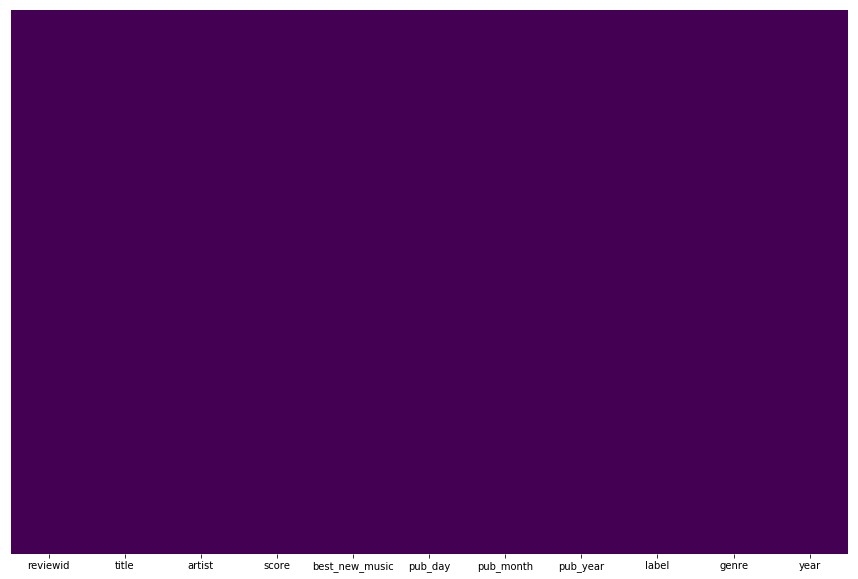

In [235]:
# Checking for presence of null values in each column, where purple = data and yellow = NULL

fig, ax = plt.subplots(figsize = (15,10))
sns.heatmap(pitchfork_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [236]:
# Pre-Final check: did we get rid of all NULL values? If any columns are TRUE, we still have NULL values. 

pd.isnull(pitchfork_data).sum() > 0

reviewid          False
title             False
artist             True
score             False
best_new_music    False
pub_day           False
pub_month         False
pub_year          False
label             False
genre             False
year              False
dtype: bool

In [237]:
# Let's check how much of the dataset null values occupy for the artist variable:

round(len(pitchfork_data[pitchfork_data['artist'].isna() == 1])*100/len(pitchfork_data['artist']), 3) 

0.006

0.004% of the cleaned dataset, which means even less of the original dataset. 

In [238]:
# Let's now drop those as well 

pitchfork_data.dropna(subset=['artist'], inplace=True)

In [239]:
# Final check: did we get rid of all NULL values? If any columns are TRUE, we still have NULL values. 

pd.isnull(pitchfork_data).sum() > 0

reviewid          False
title             False
artist            False
score             False
best_new_music    False
pub_day           False
pub_month         False
pub_year          False
label             False
genre             False
year              False
dtype: bool

In [240]:
# For easiness, let's rename the variable and reset indices

df = pitchfork_data.reset_index()

In [241]:
# We need to drop the newly-created index variable

df.drop(axis=1, columns=['index'], inplace=True)

In [242]:
df.head()

,reviewid,title,artist,score,best_new_music,pub_day,pub_month,pub_year,label,genre,year
0,22703,mezzanine,massive attack,9.3,0,8,1,2017,virgin,electronic,1998
1,22721,prelapsarian,krallice,7.9,0,7,1,2017,hathenter,metal,2016
2,22659,all of them naturals,uranium club,7.3,0,7,1,2017,fashionable idiots,rock,2016
3,22661,first songs,"kleenex, liliput",9.0,1,6,1,2017,kill rock stars,rock,2016
4,22725,new start,taso,8.1,0,6,1,2017,teklife,electronic,2016


# Part 2: Data Visualization

### Descriptive Statistics

**Year-based analysis**

Text(0.5,1,'Number of Albums per Year of Publication (Chronological)')

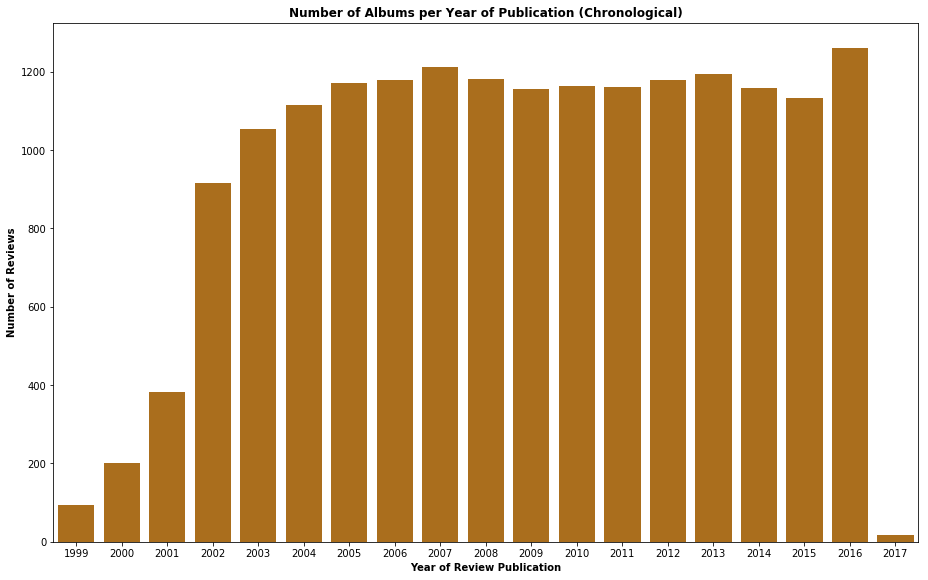

In [243]:
# Let's see how many albums were reviewed per each year of review publication:


# Ordered by year 

plt.figure(figsize=(13,8))
sns.countplot(x='pub_year', data=df, color='#C17205')
plt.tight_layout()
plt.xlabel('Year of Review Publication', weight = 'bold')
plt.ylabel('Number of Reviews', weight = 'bold')
plt.title('Number of Albums per Year of Publication (Chronological)', weight = 'bold')

If the dataset has been built by correct scraping, we can see that Pitchfork picked up in year 2002, rising to an approximate average number of 1600 reviews per year, as of 2004. One exception to this is year 2015, which can be due to trends in the music industry. 2017 is an outlier here, as the data was likely acquired in that year, when there was not enough reviews yet. So, if we look at the range from 2004 - 2016, the distribution seems fairly uniform. 

Text(0.5,1,'Number of Albums per Year of Album Release (Chronological)')

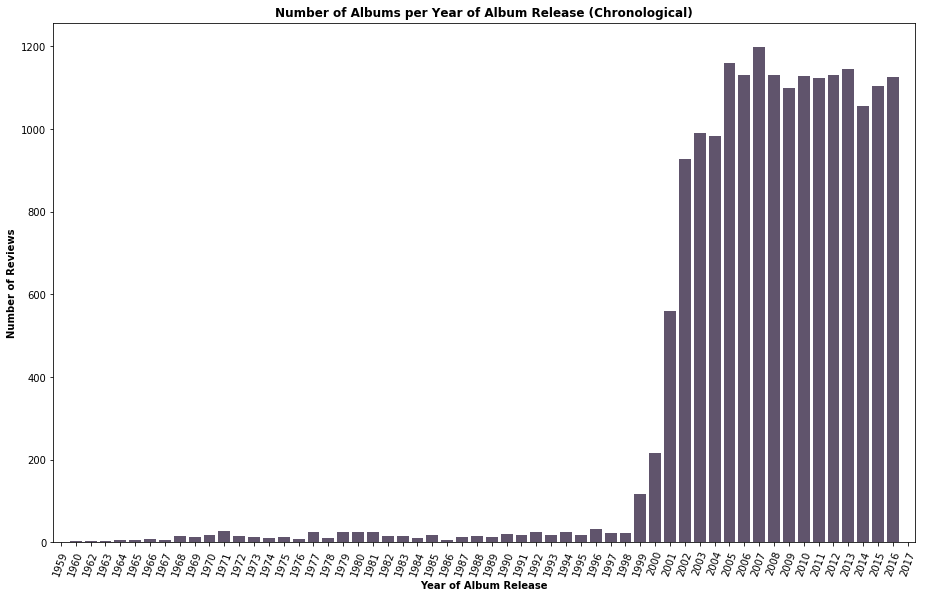

In [244]:
# Let's see how these plots look like for year of album release:

# Ordered by year 

plt.figure(figsize=(13,8))
sns.countplot(x=df['year'].astype(int), data=df, color='#605070')
# casting as integer here since xticks plots numbers as floats
plt.tight_layout()
plt.xticks(rotation=70)
plt.xlabel('Year of Album Release', weight = 'bold')
plt.ylabel('Number of Reviews', weight = 'bold')
plt.title('Number of Albums per Year of Album Release (Chronological)', weight = 'bold')

We see a different distribution year: low-frequency counts for years before 1999, when Pitchfork's first publications are recorded in this dataset. This is because Pitchfork often reviews older albums, either because they got re-released or because an author offers a fresher perspective on iconic albums.

Text(80.75,0.5,'Number of Reviews')

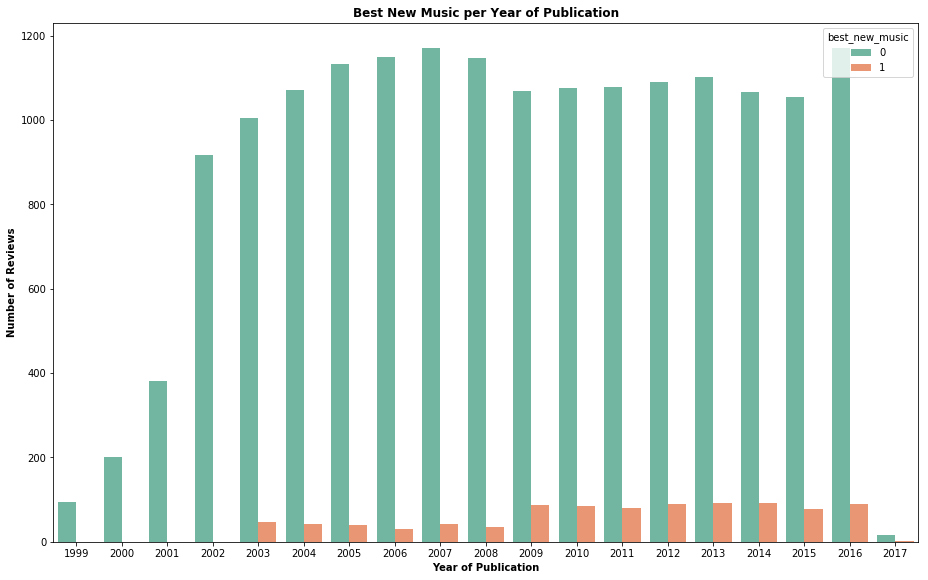

In [245]:
# Let's see how the distribution changes for 'best new music' across years for Pitchfork

plt.figure(figsize=(13,8))
sns.countplot(x='pub_year', hue='best_new_music', data=df, palette='Set2')
plt.tight_layout()
plt.title('Best New Music per Year of Publication', weight = 'bold')
plt.xlabel('Year of Publication', weight = 'bold')
plt.ylabel('Number of Reviews', weight = 'bold')

We can see that Pitchfork introduced the concept in 2003, and that only a small percentage of albums each year is classified as 'Best New Music.' Interestingly, this number picked up in 2009 and onward.

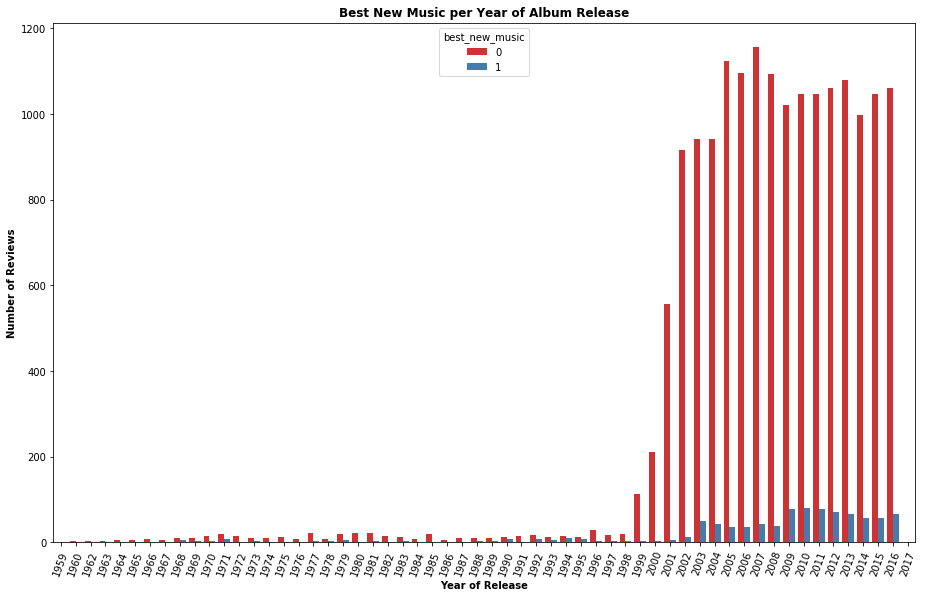

In [246]:
# Now, let's see how the distribution changes for 'best new music' across years of album release

plt.figure(figsize=(13,8))
sns.countplot(x=df['year'].astype(int), hue='best_new_music', data=df, palette='Set1')
plt.tight_layout()
plt.title('Best New Music per Year of Album Release', weight = 'bold')
plt.xlabel('Year of Release', weight = 'bold')
plt.ylabel('Number of Reviews', weight = 'bold')
plt.xticks(rotation=70)
plt.show()

The trend generally is consistent, even when looking at year of release instead of year of publication, though we can notice that a fair number of pre-Pitchfork era albums have been classified as best new music. These were likely re-releases of older or iconic albums. 

**Genre-based analysis**

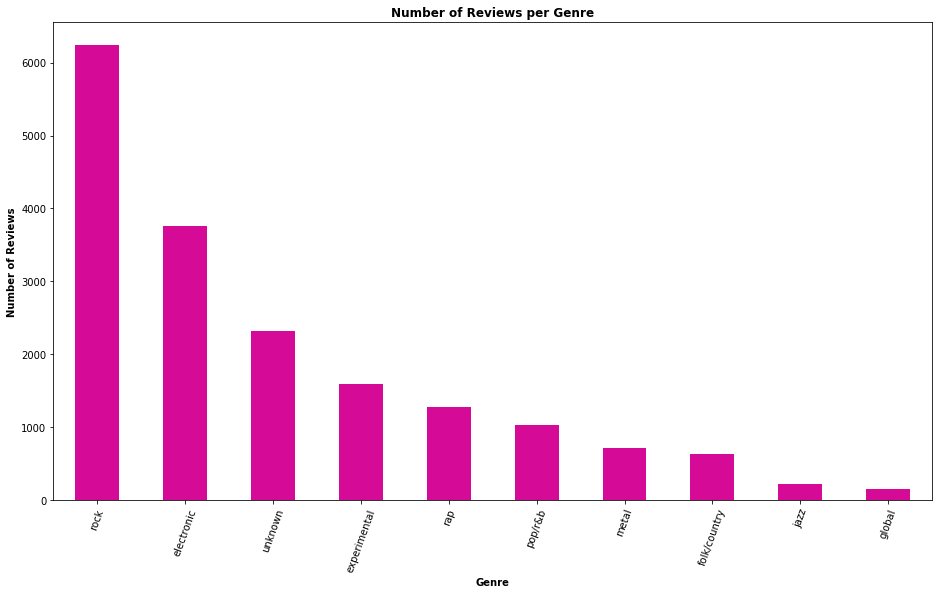

In [247]:
# Let's see which genres generally tend to be Pitchfork's main focus. 

# Ordered by genre

plt.figure(figsize=(13,8))
df['genre'].value_counts().plot(kind='bar', color = '#D50A97')
plt.tight_layout()
plt.xlabel('Genre', weight = 'bold')
plt.ylabel('Number of Reviews', weight = 'bold')
plt.title('Number of Reviews per Genre', weight = 'bold')
plt.xticks(rotation = 70)
plt.show()

Rock music is Pitchfork's primary editorial focus, followed by electronic and experimental. Since the missing genre data has been imputated using 'unknown' label, there is a solid portion of the reviews belonging to this category. Had the data been imputated differently, the unknown category would have likely been distributed over these three genres. 

**Label-based analysis**

In [248]:
# Let's see if there are any particular labels that Pitchfork tends to review albums from. 

# First, let's see how many labels there are in this dataset. 

len(df['label'].unique())

3338

That's too many labels, so let's only pick the top 20. 

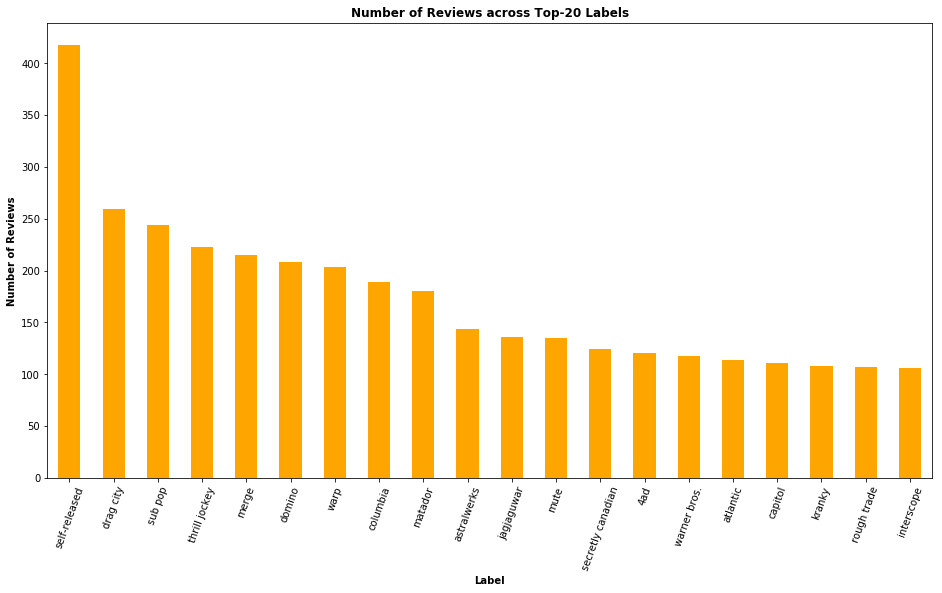

In [249]:
plt.figure(figsize=(13,8))
df['label'].value_counts()[0:20].plot(kind='bar', color = 'orange')
plt.tight_layout()
plt.xlabel('Label', weight = 'bold')
plt.ylabel('Number of Reviews', weight = 'bold')
plt.title('Number of Reviews across Top-20 Labels', weight = 'bold')
plt.xticks(rotation = 70)
plt.show()

Interestingly, this shows that Pitchfork does tend to review a fair number of self-released records, thus indicating interest and focus on independent/indie music. 

**Score-based analysis**

Text(0,0.5,'Number of Reviews')

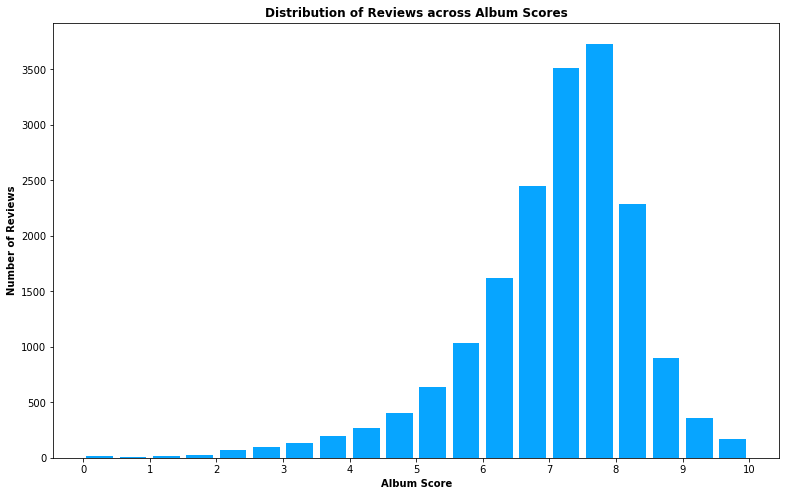

In [250]:
# Let's see the distribution of Pitchfork scores

fig1, ax1 = plt.subplots(figsize = (13,8))
ax1.hist(df.score, bins = 20, range = (0,10), rwidth  = 0.8, color='#07A5FF')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax1.set_title("Distribution of Reviews across Album Scores", weight = 'bold')
ax1.set_xlabel("Album Score", weight = 'bold')
ax1.set_ylabel("Number of Reviews", weight = 'bold')

We can see that the distribution of scores is negatively skewed, with most reviews assigning a score between 7 and 8. As an interesting side note, this is fairly similar to my distribution of album scores presented in the music-score-analysis repository. 

## Part 3: Data Visualization

### Inferential Statistics

I was interested in understanding whether there was any pattern as to how Pitchfork assigns Best New Music (BNM) to albums. I often read their reviews and find that great albums will often fall short of a few decimal points (usually in the 8.0 - 8.5 range) and not be assigned Best New Music status. 

In [251]:
# First, let's see what's the minimum score for Best New Music Albums?

best_new_music = df[df['best_new_music'] == 1]

Text(0,0.5,'Number of Reviews')

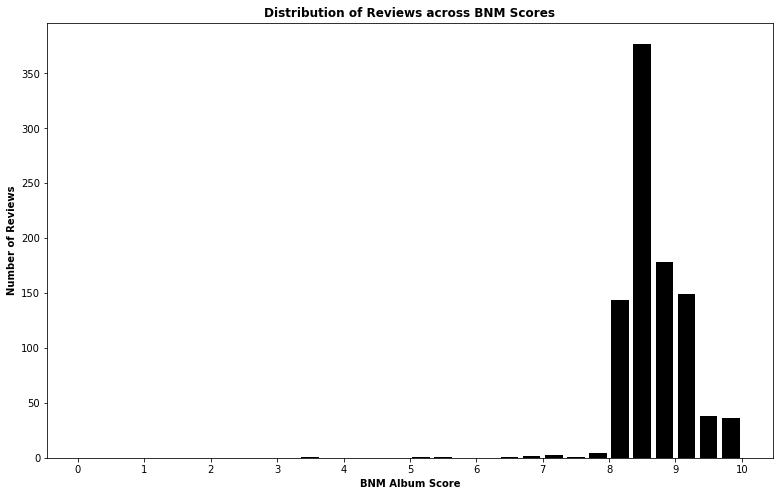

In [252]:
# Let's get the usual distribution of these scores in form of a histogram

fig1, ax1 = plt.subplots(figsize = (13,8))
ax1.hist(best_new_music.score, bins=30, range = (0,10), rwidth  = 0.8, color='black')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
ax1.set_title("Distribution of Reviews across BNM Scores", weight = 'bold')
ax1.set_xlabel("BNM Album Score", weight = 'bold')
ax1.set_ylabel("Number of Reviews", weight = 'bold')

That's an interesting one, having Best New Music with a few low scores. For the sake of personal interest, I wanted to see which albums these were. 

In [253]:
best_new_music[best_new_music['score'] < 7]

,reviewid,title,artist,score,best_new_music,pub_day,pub_month,pub_year,label,genre,year
75,22393,unfinished music no. 1: two virgins,"yoko ono, john lennon",6.8,1,5,12,2016,chimera,experimental,1968
2749,19775,m83,m83,6.5,1,4,9,2014,mute,electronic,2001
6810,15221,queen,queen,6.7,1,24,3,2011,island,rock,2011
7229,14817,death to false metal,weezer,3.5,1,3,11,2010,geffen,rock,2010
7881,14153,incredible string band,incredible string band,5.2,1,21,4,2010,fledg'ling,rock,2010
9065,12938,pablo honey: collector's edition,radiohead,5.4,1,16,4,2009,capitol,rock,2009


Something seems off here -- after some researching online, it doesn't seem M83's eponymous EP was ever included on a Best New Music list. Additionally, from anecdotal experience, Best New Music tends to be assigned to 8.0+ albums (and, I believe, 8.3+ albums). So, I will restrict my analysis to 8.0+ albums, as well as to those that have been released after 2003, when they introduced the concept, even though they might have classified some re-issues as Best New Music. 

In [254]:
# Extracting those reviews for albums released in 2003 and onward, with scores 8+
filters_applied_df_initial = df[df['year'] >= 2003]
df_filters = filters_applied_df_initial[filters_applied_df_initial['score'] >= 8]

In [255]:
df_filters.head()

,reviewid,title,artist,score,best_new_music,pub_day,pub_month,pub_year,label,genre,year
3,22661,first songs,"kleenex, liliput",9.0,1,6,1,2017,kill rock stars,rock,2016
4,22725,new start,taso,8.1,0,6,1,2017,teklife,electronic,2016
10,22715,clear sounds/perfetta,harry bertoia,8.0,0,4,1,2017,important,experimental,2016
11,22745,run the jewels 3,run the jewels,8.6,1,3,1,2017,self-released,rap,2016
17,22719,merry christmas lil mama,"chance the rapper, jeremih",8.1,0,30,12,2016,self-released,pop/r&b,2016


Let's see what the distribution looks like for these high-scoring albums that were not assigned Best New Music?

In [256]:
# High-scoring albums that are not BNM

not_BNM = df_filters[df_filters['best_new_music'] == 0]

Text(0,0.5,'Number of Reviews')

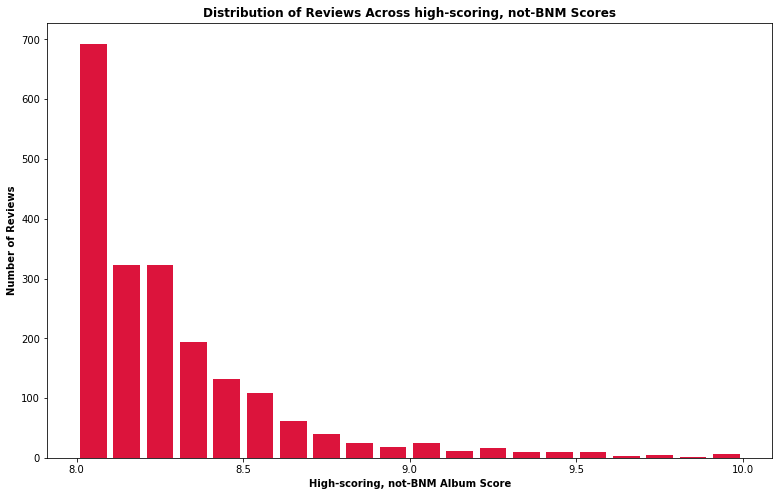

In [257]:
# We do another histogram here. 

fig1, ax1 = plt.subplots(figsize = (13,8))
ax1.hist(not_BNM.score, bins=20, range = (8,10), rwidth  = 0.8, color='crimson')
plt.xticks([8, 8.5, 9, 9.5, 10])
ax1.set_title("Distribution of Reviews Across high-scoring, not-BNM Scores", weight = 'bold')
ax1.set_xlabel("High-scoring, not-BNM Album Score", weight = 'bold')
ax1.set_ylabel("Number of Reviews", weight = 'bold')

In [258]:
# Now, let's do the same for high-scoring BNM albums. 

yes_BNM = df_filters[df_filters['best_new_music'] == 1]

Text(0,0.5,'Number of Reviews')

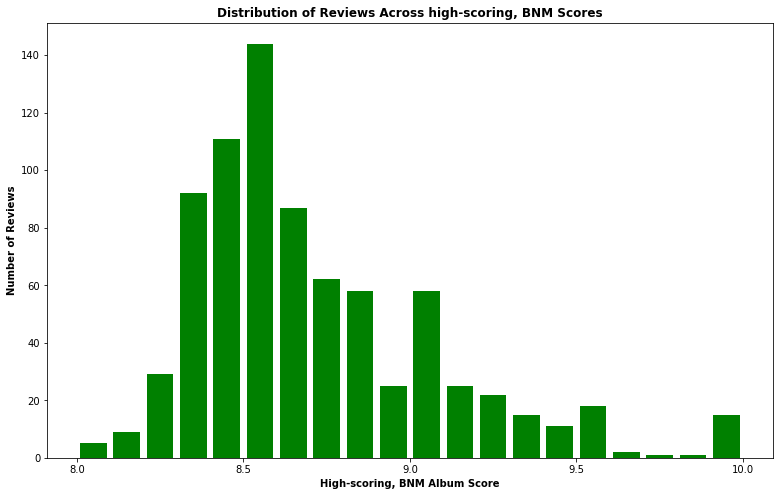

In [259]:
# We do another histogram here. 

fig1, ax1 = plt.subplots(figsize = (13,8))
ax1.hist(yes_BNM.score, bins=20, range = (8,10), rwidth  = 0.8, color='green')
plt.xticks([8, 8.5, 9, 9.5, 10])
ax1.set_title("Distribution of Reviews Across high-scoring, BNM Scores", weight = 'bold')
ax1.set_xlabel("High-scoring, BNM Album Score", weight = 'bold')
ax1.set_ylabel("Number of Reviews", weight = 'bold')

That's an interesting finding: even though some albums get high scores, they still might not be assigned 'Best New Music' status. The distribution is expectedly resembling an exponential decay, with most falling into the 8.0 - 8.3 category, but it's still surprising to see that some high-scoring albums never got assigned Best New Music feature.

The question is: is there any pattern to this? My assumption was that this could occur across two categories:

* genre
* label

For example, I suspected that some high-scoring albums in non-mainstream genres and fairly obscure labels did not get assigned Best New Music. One way to check this was to define a metric called "Best New Music-to-High Scoring Album" Ratio, indicating number of BNM albums over all high-scoring albums in that particular category. 

In [260]:
# Let's do it according to genre

genre_split_counts = df_filters.groupby([df_filters.genre, df_filters.best_new_music]).reviewid.count()

In [261]:
genre_split_counts

genre         best_new_music
electronic    0                 411
              1                 165
experimental  0                 231
              1                  98
folk/country  0                  88
              1                  25
global        0                  38
              1                   7
jazz          0                  35
              1                  14
metal         0                 111
              1                  18
pop/r&b       0                  78
              1                  59
rap           0                 127
              1                  60
rock          0                 593
              1                 301
unknown       0                 301
              1                  43
Name: reviewid, dtype: int64

In [262]:
# Let's get the total 

genre_count = df_filters.groupby([df_filters.genre]).reviewid.count()

In [263]:
genre_count

genre
electronic      576
experimental    329
folk/country    113
global           45
jazz             49
metal           129
pop/r&b         137
rap             187
rock            894
unknown         344
Name: reviewid, dtype: int64

In [264]:
# Let's extract all the ratios 

ratios = genre_split_counts/genre_count

In [265]:
ratios

genre         best_new_music
electronic    0                 0.713542
              1                 0.286458
experimental  0                 0.702128
              1                 0.297872
folk/country  0                 0.778761
              1                 0.221239
global        0                 0.844444
              1                 0.155556
jazz          0                 0.714286
              1                 0.285714
metal         0                 0.860465
              1                 0.139535
pop/r&b       0                 0.569343
              1                 0.430657
rap           0                 0.679144
              1                 0.320856
rock          0                 0.663311
              1                 0.336689
unknown       0                 0.875000
              1                 0.125000
Name: reviewid, dtype: float64

In [266]:
# Let's get the ratios within genre for Best New Music

BNM_ratios_uncleaned = ratios[ratios.index.get_level_values('best_new_music') == 1]

In [267]:
# Let's drop the multi-index, which used to be best_new_music, since they will all be 1. 

BNM_ratios_cleaned = BNM_ratios_uncleaned.reset_index(level=1, drop=True)

In [268]:
# Let's sort them in decreasing order

BNM_ratios = BNM_ratios_cleaned.sort_values(ascending=False)

In [269]:
BNM_ratios

genre
pop/r&b         0.430657
rock            0.336689
rap             0.320856
experimental    0.297872
electronic      0.286458
jazz            0.285714
folk/country    0.221239
global          0.155556
metal           0.139535
unknown         0.125000
Name: reviewid, dtype: float64

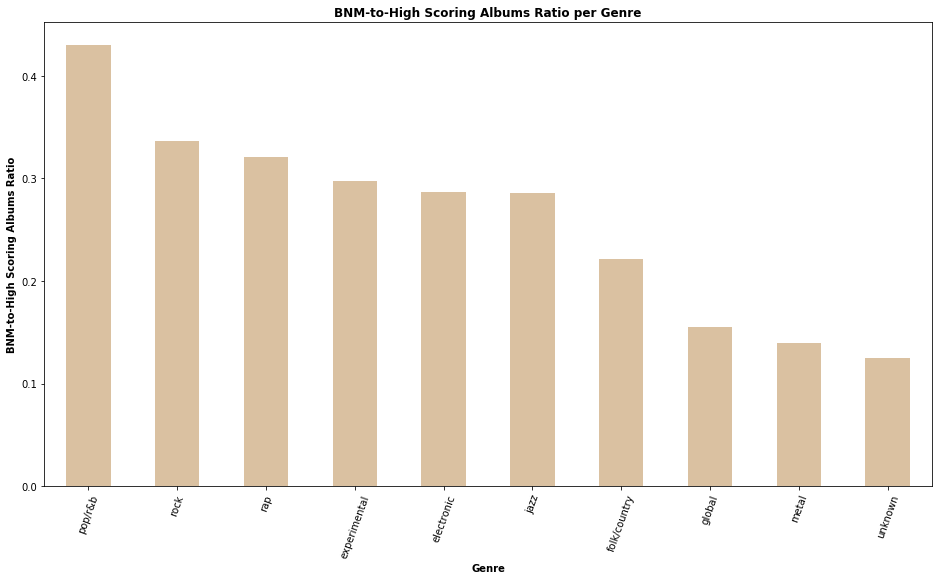

In [270]:
plt.figure(figsize=(13,8))
BNM_ratios.plot(kind = 'bar', color = '#DAC1A1')
plt.tight_layout()
plt.xlabel('Genre', weight = 'bold')
plt.ylabel('BNM-to-High Scoring Albums Ratio', weight = 'bold')
plt.title('BNM-to-High Scoring Albums Ratio per Genre', weight = 'bold')
plt.xticks(rotation = 70)
plt.show()

We can see that there is certainly a notable difference across genres, mostly between Pop & R&B, which get a fair number of Best-New-Music attribution compared to genres like Global, Metal. An 'unknown' genre in this case is not too insightful, but it does give us retrospective insight that genres in this category might not be the top ones like Pop, Rock, Electronic, and Experimental. Even without applying proportion-based confidence intervals, we can safely assume that Pitchfork does have bias toward particular genres when it comes to assigning Best New Music attribute. 

In [271]:
# Let's do the same for labels now, but only for the top 20, since there are too many labels. 

top_20_labels = df['label'].value_counts()[0:20]

In [272]:
# What are the label keys?

top_20_labels.keys()

Index([u'self-released', u'drag city', u'sub pop', u'thrill jockey', u'merge',
       u'domino', u'warp', u'columbia', u'matador', u'astralwerks',
       u'jagjaguwar', u'mute', u'secretly canadian', u'4ad', u'warner bros.',
       u'atlantic', u'capitol', u'kranky', u'rough trade', u'interscope'],
      dtype='object')

In [273]:
# We redefine the dataframe

df_filters_l = df_filters[df_filters['label'].isin(top_20_labels.keys())]

In [274]:
# Let's do the same for labels now

label_split_counts = df_filters_l.groupby([df_filters_l.label, df_filters_l.best_new_music]).reviewid.count()

In [275]:
# Let's get the total count per label

label_counts = df_filters_l.groupby([df_filters_l.label]).reviewid.count()

In [276]:
# Let's get the ratios

ratios_labels = label_split_counts/label_counts

In [277]:
# Let's get the ratios within label for Best New Music

BNM_ratios_uncleaned_labels = ratios_labels[ratios_labels.index.get_level_values('best_new_music') == 1]

In [278]:
# Let's drop the multi-index, which used to be best_new_music, since they will all be 1. 

BNM_ratios_cleaned_labels = BNM_ratios_uncleaned_labels.reset_index(level=1, drop=True)

In [279]:
# Let's sort them in decreasing order

BNM_ratios_labels = BNM_ratios_cleaned_labels.sort_values(ascending=False)

In [280]:
BNM_ratios_labels

label
interscope           0.666667
secretly canadian    0.647059
4ad                  0.622222
domino               0.568966
kranky               0.526316
jagjaguwar           0.523810
mute                 0.480000
warp                 0.477273
sub pop              0.433962
columbia             0.409091
matador              0.384615
rough trade          0.375000
capitol              0.333333
self-released        0.317073
merge                0.279070
atlantic             0.272727
drag city            0.268293
astralwerks          0.240000
warner bros.         0.166667
thrill jockey        0.041667
Name: reviewid, dtype: float64

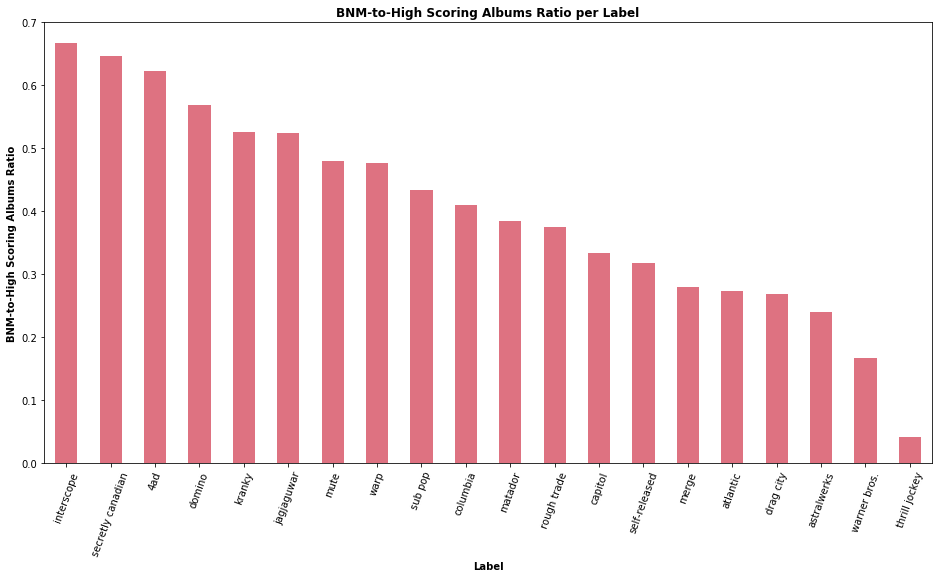

In [281]:
plt.figure(figsize=(13,8))
BNM_ratios_labels.plot(kind = 'bar', color = '#DE7281')
plt.tight_layout()
plt.xlabel('Label', weight = 'bold')
plt.ylabel('BNM-to-High Scoring Albums Ratio', weight = 'bold')
plt.title('BNM-to-High Scoring Albums Ratio per Label', weight = 'bold')
plt.xticks(rotation = 70)
plt.show()

As was the case with genre, there seems to be some bias toward albums released on specific labels. Of course, there could be simply a correlation between such labels and genre of music, as well as the music taste of the editorial team, but it does show, for example, that Interscope, Secretly Canadian, and 4AD (for which I particularly suspected that Pitchfork would lean toward) tend to have more high-scoring albums classified as Best New Music. 

## Part 4: Data Extraction

Here, I was mostly interested in extracting the portion of Pitchfork data in connection to some of the questions I had on their editorial opinion throughout the last few years. 

In [282]:
# Which albums had perfect scores?

df[df['score'] == 10]

,reviewid,title,artist,score,best_new_music,pub_day,pub_month,pub_year,label,genre,year
191,22374,metal box,public image ltd,10.0,1,1,11,2016,universal,rock,1979
200,22485,blood on the tracks,bob dylan,10.0,0,30,10,2016,columbia,rock,1975
354,22061,another green world,brian eno,10.0,0,18,9,2016,island,experimental,1975
450,22174,songs in the key of life,stevie wonder,10.0,0,21,8,2016,motown,pop/r&b,1976
529,22159,in concert,nina simone,10.0,0,30,7,2016,philips,jazz,1964
652,22053,tonight's the night,neil young,10.0,0,26,6,2016,reprise,rock,1975
704,21964,hounds of love,kate bush,10.0,0,12,6,2016,emi,pop/r&b,1985
854,21845,"sign ""o"" the times",prince,10.0,0,30,4,2016,paisley park,pop/r&b,1987
855,21842,1999,prince,10.0,0,30,4,2016,warner bros.,pop/r&b,1982
858,21841,purple rain,"prince, the revolution",10.0,0,29,4,2016,warner bros.,pop/r&b,1984


In [283]:
# How many albums got perfect scores?

round(len(df[df['score'] == 10])/len(df),3)*100

0.4

Only 0.4% of albums!

In my own analysis of music-listening behavior, I discovered that top-listening years were 2009, 2011, and 2013 for me. I
wanted to see which albums were best-new music for Pitchfork in those years. 

In [284]:
# 2009 
pd.options.display.max_rows = 100
df_2009 = df[df['year'] == 2009]
df_2009[df_2009['best_new_music'] == 1]
df_2009.head()

,reviewid,title,artist,score,best_new_music,pub_day,pub_month,pub_year,label,genre,year
798,21869,happy songs for happy zombies,pinkshinyultrablast,6.9,0,17,5,2016,club ac30,rock,2009
3047,19402,midtown 120 blues,dj sprinkles,8.5,1,2,6,2014,comatonse,unknown,2009
4725,17504,rifts,oneohtrix point never,8.7,1,11,1,2013,mexican summer,experimental,2009
7621,14400,bonjour,rachid taha,7.5,0,7,7,2010,knitting factory,global,2009
7744,14218,me oh my,cate le bon,7.3,0,1,6,2010,control group,folk/country,2009


**Interpretation**: Pitchfork also had Bat for Lashes - Two Suns and Fever Ray - Fever Ray in their list of best albums for 2009. These are some of my favorite albums. 

In [285]:
# 2011 

df_2011 = df[df['year'] == 2011]
df_2011[df_2011['best_new_music'] == 1]
df_2011.head()

,reviewid,title,artist,score,best_new_music,pub_day,pub_month,pub_year,label,genre,year
691,22006,early recordings,waxahatchee,7.2,0,15,6,2016,merge,rock,2011
2164,20322,it never goes out,the hotelier,7.7,0,20,3,2015,tiny engines,rock,2011
2712,19803,vibe 2,various artists,7.8,0,16,9,2014,future times,unknown,2011
2746,19776,cowboy's prayer ep,mutual benefit,6.3,0,5,9,2014,other music,folk/country,2011
3207,19184,dizzy polizzy,purling hiss,7.5,0,17,4,2014,drag city,rock,2011


**Interpretation**: PJ Harvey's Let England Shake nicely made the list, which I also liked a lot. Good to see St. Vincent's Strange Mercy in there as well. 

In [286]:
# 2013 

df_2013 = df[df['year'] == 2013]
df_2013[df_2013['best_new_music'] == 1]
df_2013.head()

,reviewid,title,artist,score,best_new_music,pub_day,pub_month,pub_year,label,genre,year
1267,21368,t r i s h ep,odd nosdam,6.8,0,6,1,2016,sonic cathedral,rap,2013
3149,19295,a letter home,neil young,6.3,0,2,5,2014,third man,rock,2013
3357,18881,three seashells,lakutis,6.7,0,6,3,2014,greedhead,rap,2013
3406,19026,acid arab collections,various artists,6.8,0,20,2,2014,versatile,unknown,2013
3438,18982,soak,foetus,6.9,0,11,2,2014,ectopic,electronic,2013


**Interpretation**: Several nice ones in here as well, including Janelle Monae, Julia Holter, Rhye, and Disclosure, though I strongly disagree on The Knife's Shaking the Habitual. 